# Download Web Pages with Requests 
<p> Going to be scraping nasa rover curiosity images </p>

##### Python module/package imports for  chapter 3


In [1]:
import os, sys, json, collections, re, io, base64 

import numpy as np #import a library using an alias

import matplotlib
import matplotlib.pyplot as pp
import matplotlib.animation as anim
from mpl_toolkits.basemap import Basemap

%matplotlib inline



import requests #HTTP 
import bs4 #Beautiful soup, web scraper

import IPython.display #Allows you to display in image inline with code
import PIL, PIL.Image, PIL.ImageOps, PIL.ImageEnhance #Python imaging library - now "Pillow"


## Downloading web content with requests 
<p>Example page no longer exists, but the concepts will still help </p>
Requests library supports:
<ul> 
    <li>Get and Post </li>
    <li>Form data and file uploads </li>
    <li>Redirection History </li>
    <li>Cookies </li>
    <li>Persistent Sessions </li>
    <li>SSL connections and proxies </li>
    <li>Authentications </li>
</ul>

In [2]:
images = requests.get('http://mars.nasa.gov/mal/multimedia/raw/?s=1537&camera=FHSAZ_') # Run a request to get the image


In [3]:
images.ok # Returns false as the page no longer exists

False

### Alternate way to write a request
<p> </p>

In [4]:
images = requests.get('http://mars.nasa.gov/mal/multimedia/raw',
                     params = {'s': '1537','camera': 'FHAZ'}) # Run a request to get the image


In [5]:
images #Returns response 404 -not found , 200 - success

<Response [404]>

In [6]:
images.url

'https://mars.nasa.gov/mal/multimedia/raw?s=1537&camera=FHAZ'

In [7]:
images.status_code

404

In [8]:
images.headers #Request Headers

{'Content-Type': 'text/html; charset=UTF-8', 'Content-Length': '1395', 'Connection': 'keep-alive', 'Server': 'nginx/1.8.1', 'Last-Modified': 'Tue, 18 Jul 2017 04:32:21 GMT', 'Content-Encoding': 'gzip', 'X-Frame-Options': 'ALLOWALL', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Methods': 'POST, GET, OPTIONS, DELETE, PUT', 'Access-Control-Max-Age': '1000', 'Access-Control-Allow-Headers': 'x-requested-with, Content-Type, origin, authorization, accept, client-security-token', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload;', 'Accept-Ranges': 'bytes', 'Date': 'Tue, 23 Jun 2020 14:34:02 GMT', 'ETag': '"ceb-554900052bf40-gzip"', 'Expires': 'Tue, 23 Jun 2020 14:36:02 GMT', 'Cache-Control': 'max-age=120', 'Vary': 'Accept-Encoding', 'X-Cache': 'Error from cloudfront', 'Via': '1.1 dd96101693c9f13a5efc3b0280199939.cloudfront.net (CloudFront)', 'X-Amz-Cf-Pop': 'YTO50-C2', 'X-Amz-Cf-Id': '46J5UOgEiDZCa8W1BHttuiQe8YAAeuSkouP4H68K6clzhmDnrnopGA==', 'Age': '1'}

In [9]:
images.text #HTML document

'<!DOCTYPE html><html> <head> <title>404 | NASA Mars</title> <meta charset="utf-8"> <meta name="viewport" content="initial-scale=1, minimum-scale=1, width=device-width"> <style>html, body{font-family: Arial, Helvetica, Times, Times New Roman;margin: 0;padding: 0;background-color: rgb(0, 33, 61);}.mainTitle{margin: 0px 20px;float: left;width: 50%;position: relative;z-index: 2}.mainTitle h1{padding: 25px 20px 0 !important;font-size: 36px;line-height: 34px;margin-top: 30px;letter-spacing: 2px;text-align: left;padding: 0 !important;color: white;}.nasalogo{width: 50px;height: 30px;float: left;padding: 35px;background-image: url(\'/images/general/NASA-Logo.png\');background-size: cover;margin: 0 0 0 25px;}#error{position: relative;z-index: 0;background: url(\'/imgs/mep/mars-orbiters-and-rovers.jpg\'), url(\'/imgs/mep/mars-orbiters-and-rovers-repeat.png\');background-position: top right, top right;background-repeat: no-repeat, repeat-x;min-height:800px; height: 1065px;height:92vh;}#error .tex

## Parse HTML with Beautiful Soup
<p> Python package to navigate, search and modify the HTML Tree in a pythonic way. </p>

In [10]:
#Required requests before bs4
#normal method when site works:
#pageRequest = requests.get('http://mars.nasa.gov/mal/multimedia/raw',
#                     params = {'s': '1537','camera': 'FHAZ'}) # Run a request to get the image, sites down

#htmlPage = pageRequest.text #Get the html source code

htmlPage = json.load(open('sol1460.json','r')) #load html source code from json because site is down



In [11]:
#Start BS4
soup = bs4.BeautifulSoup(htmlPage,'lxml')

In [12]:
soup #now contains the complete source code


<!-- CGI.HTTP_HOST: mars.jpl.nasa.gov --><!-- [r.cn: -- /websites/cmsroot/multimedia/raw/index.cfm,/websites/mars/cmsroot/multimedia/raw/index.cfm,/websites/mars/cmsroot/multimedia/raw/test/index.cfm -- /websites/cmsroot/multimedia/raw/index.cfm] --><!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html>
<head>
<title>Raw Images - Mars Science Laboratory</title>
<meta content="Raw Images" name="title"/>
<meta content="Raw Images - Mars Science Laboratory" property="og:title"/>
<meta content="JPL, NASA" name="creator"/>
<meta content="JPL, NASA" name="author"/>
<meta content="Curiosity, raw images, multimedia, Mars Science Laboratory, Curiosity, MSL, Rover, Planet Mars" name="keywords"/>
<meta content="Mars Science Laboratory rover Curiosity exploring the planet mars - facts, information, videos and pictures" name="description"/>
<meta content="Mars Science Laboratory rover Curiosity exploring the planet mars - fac

In [13]:
print(soup.prettify())# Print the html formated

<!-- CGI.HTTP_HOST: mars.jpl.nasa.gov -->
<!-- [r.cn: -- /websites/cmsroot/multimedia/raw/index.cfm,/websites/mars/cmsroot/multimedia/raw/index.cfm,/websites/mars/cmsroot/multimedia/raw/test/index.cfm -- /websites/cmsroot/multimedia/raw/index.cfm] -->
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html>
 <head>
  <title>
   Raw Images - Mars Science Laboratory
  </title>
  <meta content="Raw Images" name="title"/>
  <meta content="Raw Images - Mars Science Laboratory" property="og:title"/>
  <meta content="JPL, NASA" name="creator"/>
  <meta content="JPL, NASA" name="author"/>
  <meta content="Curiosity, raw images, multimedia, Mars Science Laboratory, Curiosity, MSL, Rover, Planet Mars" name="keywords"/>
  <meta content="Mars Science Laboratory rover Curiosity exploring the planet mars - facts, information, videos and pictures" name="description"/>
  <meta content="Mars Science Laboratory rover Curiosity explo

###  Soup now contains lots of vars

In [14]:
soup.head

<head>
<title>Raw Images - Mars Science Laboratory</title>
<meta content="Raw Images" name="title"/>
<meta content="Raw Images - Mars Science Laboratory" property="og:title"/>
<meta content="JPL, NASA" name="creator"/>
<meta content="JPL, NASA" name="author"/>
<meta content="Curiosity, raw images, multimedia, Mars Science Laboratory, Curiosity, MSL, Rover, Planet Mars" name="keywords"/>
<meta content="Mars Science Laboratory rover Curiosity exploring the planet mars - facts, information, videos and pictures" name="description"/>
<meta content="Mars Science Laboratory rover Curiosity exploring the planet mars - facts, information, videos and pictures" property="og:description"/>
<meta content="http://mars.jpl.nasa.gov/msl/multimedia/raw/" property="og:url"/>
<meta content="24YTv3DMgPjuCosK3yyc8RX9chB0AzhIxGajBBxbwMU" name="google-site-verification"/>
<meta content="IE=9" http-equiv="X-UA-Compatible"/>
<meta content="http://mars.jpl.nasa.gov/layout/msl/images/FollowYourCuriosity.jpg" pro

In [15]:
type(soup.title)

bs4.element.Tag

In [16]:
soup.title.name

'title'

In [17]:
soup.title.contents

['Raw Images - Mars Science Laboratory']

In [18]:
soup.title.text #Text only

'Raw Images - Mars Science Laboratory'

In [19]:
soup.title.string

'Raw Images - Mars Science Laboratory'

In [20]:
soup.img


<img align="left" alt="Follow this link to skip to the main content" border="0" height="1" hspace="0" src="../../images/spacer.gif" vspace="0" width="1"/>

In [21]:
soup.img.attrs

{'src': '../../images/spacer.gif',
 'alt': 'Follow this link to skip to the main content',
 'width': '1',
 'height': '1',
 'hspace': '0',
 'vspace': '0',
 'border': '0',
 'align': 'left'}

In [22]:
soup.img('src'), soup.img('width')

([], [])

In [23]:
soup.map.contents[:6]

['\n',
 <area alt="NASA" coords="29,29,30" href="http://www.nasa.gov/" shape="circle"/>,
 '\n',
 <area alt="Jet Propulsion Laboratory" coords="70,5,350,32" href="http://www.jpl.nasa.gov/"/>,
 '\n',
 <area alt="California Institute of Technology" coords="69,32,350,54" href="http://www.caltech.edu/"/>]

In [24]:
soup.map.parent

<div align="center" id="contentBlueOuter_contentPage">
<!-- Skip navigation link -->
<a href="#maincontent"><img align="left" alt="Follow this link to skip to the main content" border="0" height="1" hspace="0" src="../../images/spacer.gif" vspace="0" width="1"/></a>
<!-- End skip navigation link -->
<map name="top_jplBanner">
<area alt="NASA" coords="29,29,30" href="http://www.nasa.gov/" shape="circle"/>
<area alt="Jet Propulsion Laboratory" coords="70,5,350,32" href="http://www.jpl.nasa.gov/"/>
<area alt="California Institute of Technology" coords="69,32,350,54" href="http://www.caltech.edu/"/>
<area alt="JPL HOME" coords="507,11,567,31" href="http://www.jpl.nasa.gov/index.cfm"/>
<area alt="EARTH" coords="576,9,620,31" href="http://www.jpl.nasa.gov/earth/"/>
<area alt="SOLAR SYSTEM" coords="630,9,720,31" href="http://www.jpl.nasa.gov/solar-system/"/>
<area alt="STARS &amp; GALAXIES" coords="730,10,836,31" href="http://www.jpl.nasa.gov/stars-galaxies/index.cfm"/>
<area alt="SCIENCE &am

# for p in soup.map.parents:
    print(p.name)

In [26]:
soup.find_all('img') #find all of a specific tag

[<img align="left" alt="Follow this link to skip to the main content" border="0" height="1" hspace="0" src="../../images/spacer.gif" vspace="0" width="1"/>,
 <img alt="JPL Banner" border="0" height="67" src="../../layout/msl/images/top_jplBanner.png" usemap="#top_jplBanner" width="978"/>,
 <img alt="Mars Science Laboratory" border="0" height="90" src="../../layout/msl/images/spacer.gif" title="Mars Science Laboratory" width="1000"/>,
 <img alt="Home" border="0" height="34" id="nav_home" src="../../layout/msl/images/navtop_home.png" style="_margin-top:-2px;" title="Home" width="111"/>,
 <img alt="Mission" border="0" height="34" id="nav_mission" onmouseout="changeImages('nav_mission', '../../layout/msl/images/navtop_mission.png');" onmouseover="changeImages('nav_mission', '../../layout/msl/images/navtop_mission_sel.png');" src="../../layout/msl/images/navtop_mission.png" title="Mission" width="132"/>,
 <img alt="Mission" border="0" height="34" id="nav_mission" src="../../layout/msl/image

In [27]:
imgs = [img['src'] for img in soup.find_all('img') if 'Image' in img['alt']]

In [28]:
imgs

['http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01460/opgs/edr/fcam/FRB_527107895EDR_F0572798FHAZ00337M_-thm.jpg',
 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01460/opgs/edr/fcam/FLB_527107895EDR_F0572798FHAZ00337M_-thm.jpg',
 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01460/opgs/edr/fcam/FLB_527097236EDR_F0572798FHAZ00206M_-thm.jpg',
 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01460/opgs/edr/fcam/FRB_527097236EDR_F0572798FHAZ00206M_-thm.jpg',
 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01460/opgs/edr/fcam/FLB_527096813EDR_F0572798FHAZ00206M_-thm.jpg',
 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01460/opgs/edr/fcam/FRB_527096813EDR_F0572798FHAZ00206M_-thm.jpg',
 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01460/opgs/edr/fcam/FLB_527107895EDR_T0572798FHAZ00337M_-thm.jpg',
 'http://mars

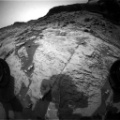

In [29]:
IPython.display.Image(imgs[0])

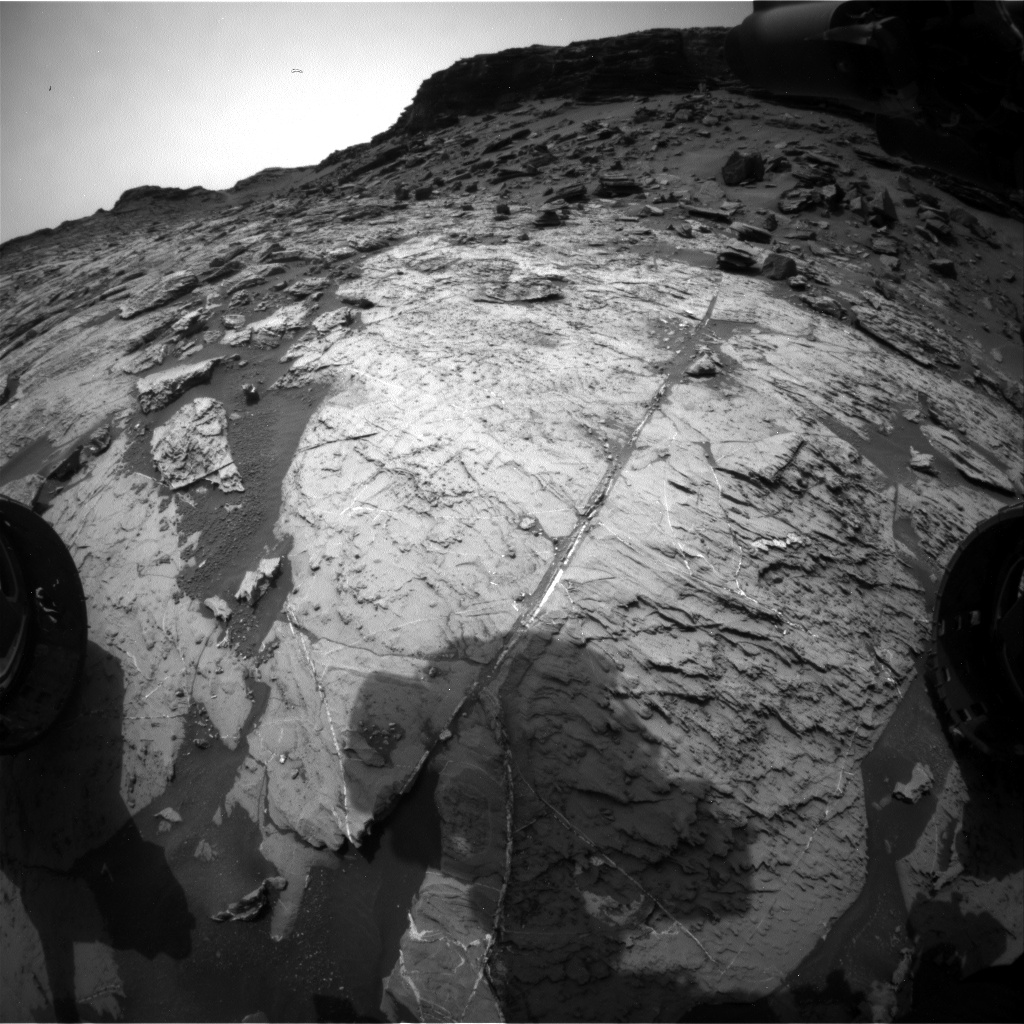

In [30]:
IPython.display.Image(re.sub('-thm','',imgs[0])) #use reges to remove -thm (this is the difference in there thumbnails vs full resolution)